## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingCLassifier
from xgboost import XGBClassifier

In [49]:
rain_df = pd.read_csv("weatherAUS.csv")

In [5]:
#To show every columns in dataframe
pd.set_option('display.max_columns', None)

In [6]:
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
# Get list of categorical variables
s = (rain_df.dtypes == 'object')
object_cols = list(s[s].index)
print("Catagorical variables: ", object_cols)

Catagorical variables:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
for i in object_cols:
    print(i,rain_df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [9]:
# Filling missing values with mode of the column in value
for i in object_cols:
    rain_df[i].fillna(rain_df[i].mode()[0], inplace= True)

In [10]:
#convert  "Rain Today" and "RainTomorrow" into binary (1/0)
rain_df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
rain_df['RainTomorrow'].replace({'No': 0, 'Yes':1}, inplace = True)

In [11]:
# Get list of neumeric variables
t = (rain_df.dtypes == 'float64')
float_cols = list(t[t].index)
print('Numeric Variables: ',float_cols)

Numeric Variables:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [12]:
for i in float_cols:
    print(i,rain_df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [13]:
# Filling missing values with median of the column in value
for i in float_cols:
    rain_df[i].fillna(rain_df[i].median(), inplace = True)

In [14]:
# let's delete the Date column, as we will not use it further in this project
rain_df.drop(columns = ['Date'],inplace = True)

In [46]:
rain_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
cat_columns = rain_df.select_dtypes(include = 'object').columns.tolist()

In [16]:
# Creating dummy variables
rain_df_dummies = pd.get_dummies(rain_df, drop_first=True, dtype = 'float64') 

rain_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 111 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(109), int64(2)
memory usage: 123.2 MB


In [48]:
rain_df_dummies.shape

(145460, 111)

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

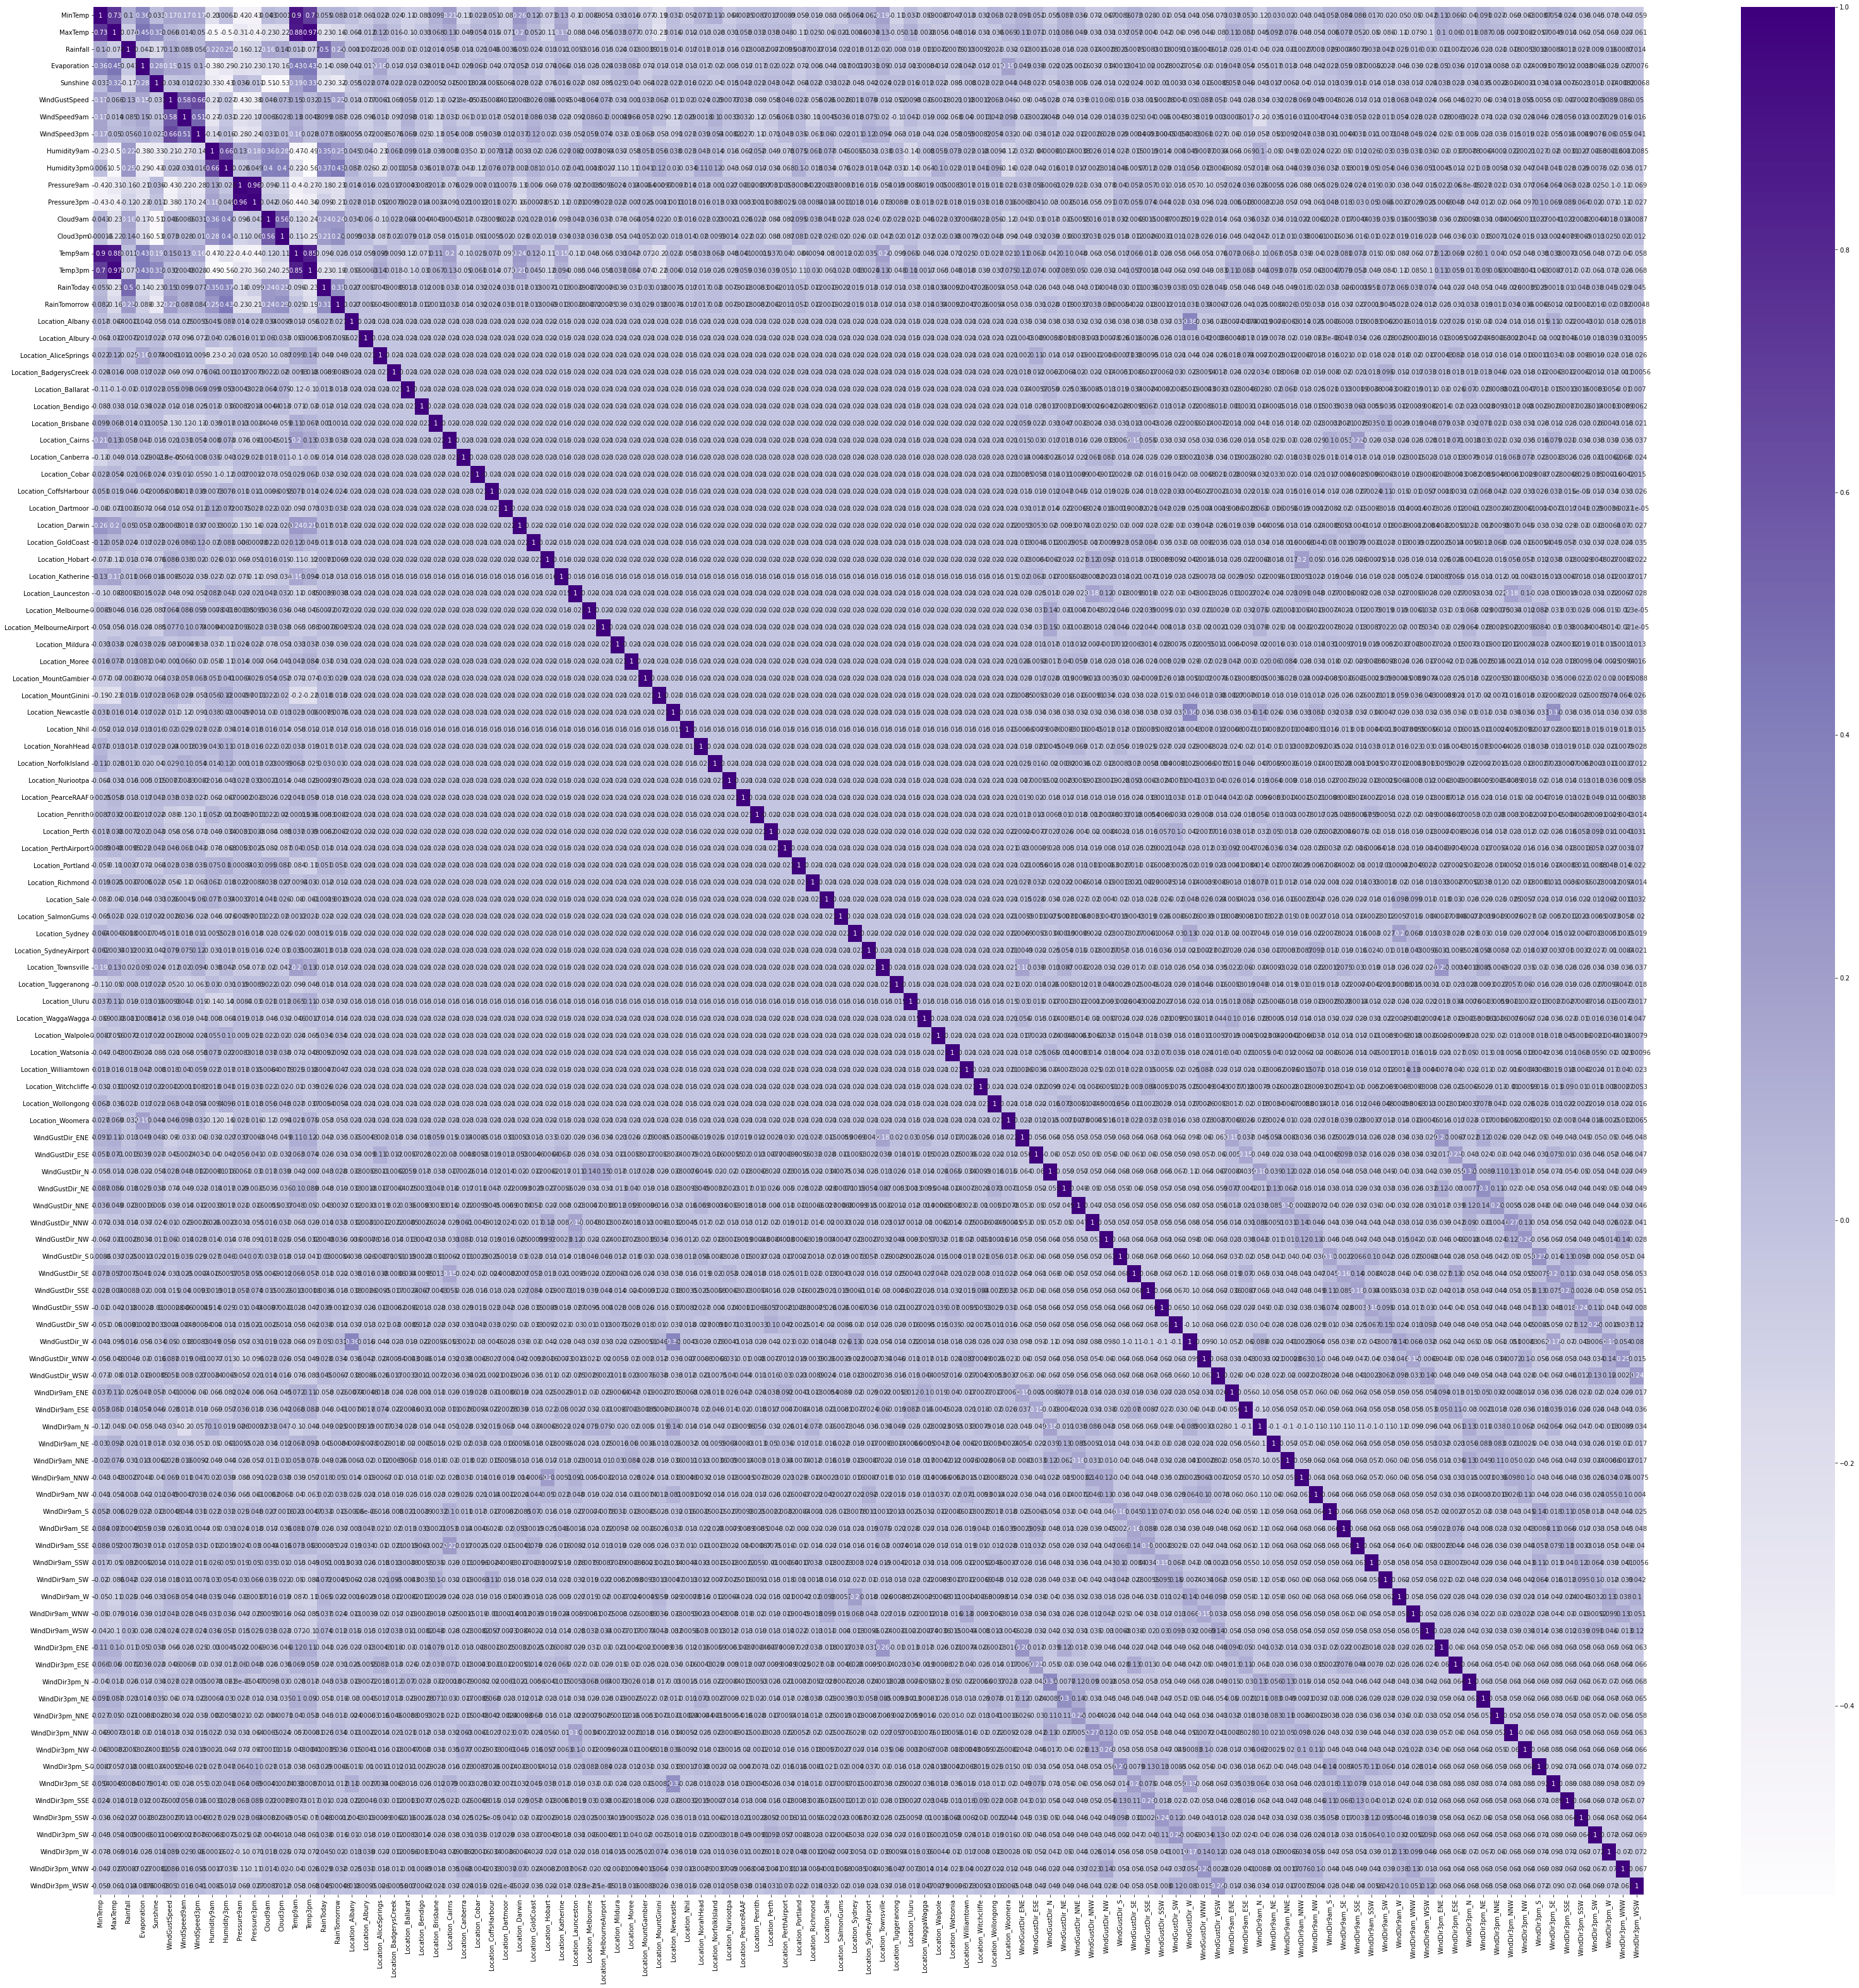

In [17]:
#build a correlation matrix
cmap = sns.diverging_palette(70,20,s=50,l=40,n=6,as_cmap = True)
corr = rain_df_dummies.corr()
f, ax = plt.subplots(figsize =(55,55))
sns.heatmap(corr,annot = True, cmap = 'Purples')

In [18]:
x = rain_df_dummies.drop(['RainTomorrow'],axis = 1).values
y = rain_df_dummies['RainTomorrow'].values
#Split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 7)
#Standardize data
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test  = scalar.transform(x_test)

## KNN Model

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
acc_knn = knn.score(x_test,y_test)

pred_knn = knn.predict(x_test)
precision_knn = precision_score(y_test, pred_knn)

recall_knn = recall_score(y_test, pred_knn)

f1_knn = f1_score(y_test,pred_knn)

In [20]:
print("1.Accuracy: ", acc_knn)
print("2. Precision: ", precision_knn)
print("3. Recall: ", recall_knn)
print("4. f1_Score: ",f1_knn)

1.Accuracy:  0.8112883266877492
2. Precision:  0.7147540983606557
3. Recall:  0.2283918281822944
4. f1_Score:  0.3461691147280667


Average Precision:  0.5158157729817834


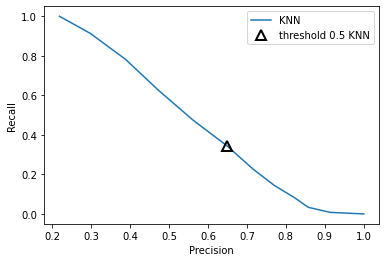

In [21]:
predicted_proba_knn = knn.predict_proba(x_test)[:,1]

precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, predicted_proba_knn)
# find the threshold closest to zero
plt.plot(precision_knn,recall_knn,label="KNN")

close_default_knn = np.argmin(np.abs(thresholds_knn - 0.5))

plt.plot(precision_knn[close_default_knn],recall_knn[close_default_knn],'^',c='k',
         markersize = 10,label = 'threshold 0.5 KNN', fillstyle = "none", mew = 2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

ap_knn =  average_precision_score(y_test, predicted_proba_knn)

print("Average Precision: ", ap_knn)

6. ROC AUC:  0.7866065438330434
Confusion Matrix:  [[33223   870]
 [ 7365  2180]]
Classification Report:                   precision    recall  f1-score   support

No RainTomorrow       0.82      0.97      0.89     34093
   RainTomorrow       0.71      0.23      0.35      9545

       accuracy                           0.81     43638
      macro avg       0.77      0.60      0.62     43638
   weighted avg       0.80      0.81      0.77     43638



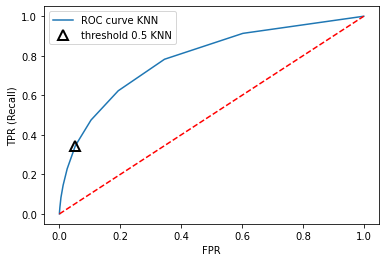

In [22]:
fpr_knn,tpr_knn, thresholds_knn =  roc_curve(y_test,predicted_proba_knn)
plt.plot(fpr_knn,tpr_knn,label = 'ROC curve KNN')
plt.xlabel('FPR')
plt.ylabel("TPR (Recall)")

close_default_knn = np.argmin(np.abs(thresholds_knn - 0.5))
plt.plot(fpr_knn[close_default_knn],tpr_knn[close_default_knn],'^',c='k',
         markersize = 10,label = 'threshold 0.5 KNN', fillstyle = "none", mew = 2)

plt.legend()
plt.plot([0,1],[0,1],'r--')

roc_auc_knn = roc_auc_score(y_test, predicted_proba_knn)

print("6. ROC AUC: ",roc_auc_knn)

cfn = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix: ",cfn)

print("Classification Report: ",classification_report(y_test, pred_knn,
                            target_names=['No RainTomorrow','RainTomorrow']))

## Decision Tree

In [23]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
acc_tree = tree.score(x_test,y_test)

pred_tree = tree.predict(x_test)
precision_tree = precision_score(y_test, pred_tree)
recall_tree = recall_score(y_test, pred_tree)
f1_tree = f1_score(y_test,pred_tree)

print("1.Accuracy: ", acc_tree)
print("2. Precision: ", precision_tree)
print("3. Recall: ", recall_tree)
print("4. f1_Score: ",f1_tree)

1.Accuracy:  0.7890599935835739
2. Precision:  0.5175837815473727
3. Recall:  0.5242535358826611
4. f1_Score:  0.520897309113621


Average Precision:  0.37546505307525496


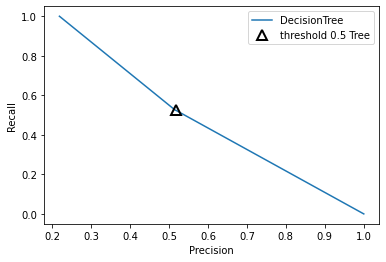

In [24]:
predicted_proba_tree = tree.predict_proba(x_test)[:,1]
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test,
                                                    predicted_proba_tree)

plt.plot(precision_tree,recall_tree,label="DecisionTree")
# find the threshold closest to zero
close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))

plt.plot(precision_tree[close_default_tree],recall_tree[close_default_tree],'^',c='k',
         markersize = 10,label = 'threshold 0.5 Tree', fillstyle = "none", mew = 2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

ap_tree =  average_precision_score(y_test, predicted_proba_tree)

print("Average Precision: ", ap_tree)

6. ROC AUC:  0.6936041045218548
Confusion Matrix:  [[29429  4664]
 [ 4541  5004]]
Classification Report:                   precision    recall  f1-score   support

No RainTomorrow       0.87      0.86      0.86     34093
   RainTomorrow       0.52      0.52      0.52      9545

       accuracy                           0.79     43638
      macro avg       0.69      0.69      0.69     43638
   weighted avg       0.79      0.79      0.79     43638



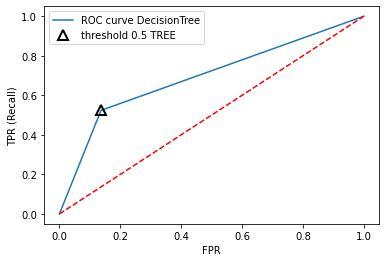

In [25]:
fpr_tree,tpr_tree, thresholds_tree =  roc_curve(y_test,predicted_proba_tree)
plt.plot(fpr_tree,tpr_tree,label = 'ROC curve DecisionTree')
plt.xlabel('FPR')
plt.ylabel("TPR (Recall)")

close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
plt.plot(fpr_tree[close_default_tree],tpr_tree[close_default_tree],'^',c='k',
         markersize = 10,label = 'threshold 0.5 TREE', fillstyle = "none", mew = 2)

plt.legend()
plt.plot([0,1],[0,1],'r--')
roc_auc_tree = roc_auc_score(y_test, predicted_proba_tree)

print("6. ROC AUC: ",roc_auc_tree)

cfn = confusion_matrix(y_test, pred_tree)
print("Confusion Matrix: ",cfn)

print("Classification Report: ",classification_report(y_test, pred_tree,
                            target_names=['No RainTomorrow','RainTomorrow']))


## RandomForest

In [26]:
rf = RandomForestClassifier(n_estimators=10, random_state=5)

rf.fit(x_train,y_train)
acc_rf = rf.score(x_test,y_test)

pred_rf = rf.predict(x_test)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test,pred_rf)

print("1.Accuracy: ", acc_rf)
print("2. Precision: ", precision_rf)
print("3. Recall: ", recall_rf)
print("4. f1_Score: ",f1_rf)

1.Accuracy:  0.8413080342820478
2. Precision:  0.7281435040055729
3. Recall:  0.43803038239916187
4. f1_Score:  0.5470007195656439


Average Precision:  0.6243533198417772


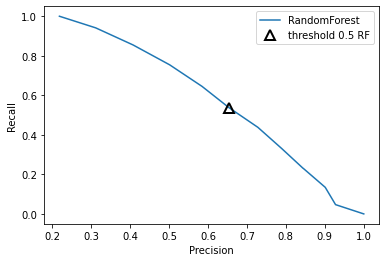

In [32]:
predicted_proba_rf = rf.predict_proba(x_test)[:,1]
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,
                                                    predicted_proba_rf)

plt.plot(precision_rf,recall_rf,label="RandomForest")
# find the threshold closest to zero
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',c='k',
         markersize = 10,label = 'threshold 0.5 RF', fillstyle = "none", mew = 2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

ap_rf =  average_precision_score(y_test, predicted_proba_rf)

print("Average Precision: ", ap_rf)


6. ROC AUC:  0.8428849526109805
Confusion Matrix:  [[32532  1561]
 [ 5364  4181]]
Classification Report:                   precision    recall  f1-score   support

No RainTomorrow       0.86      0.95      0.90     34093
   RainTomorrow       0.73      0.44      0.55      9545

       accuracy                           0.84     43638
      macro avg       0.79      0.70      0.73     43638
   weighted avg       0.83      0.84      0.83     43638



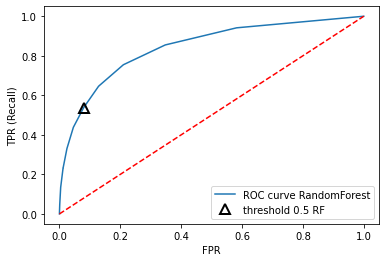

In [28]:
fpr_rf,tpr_rf, thresholds_rf =  roc_curve(y_test,predicted_proba_rf)
plt.plot(fpr_rf,tpr_rf,label = 'ROC curve RandomForest')
plt.xlabel('FPR')
plt.ylabel("TPR (Recall)")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf],tpr_rf[close_default_rf],'^',c='k',
         markersize = 10,label = 'threshold 0.5 RF', fillstyle = "none", mew = 2)

plt.legend()
plt.plot([0,1],[0,1],'r--')
roc_auc_rf = roc_auc_score(y_test, predicted_proba_rf)

print("6. ROC AUC: ",roc_auc_rf)

cfn = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix: ",cfn)

print("Classification Report: ",classification_report(y_test, pred_rf,
                            target_names=['No RainTomorrow','RainTomorrow']))


## GradientBooting Model

In [33]:
gb = GradientBoostingCLassifier(random_state = 10)
gb.fit(x_train,y_train)
acc_gb = gb.score(x_test,y_test)

pred_gb = gb.predict(x_test)
precision_gb = precision_score(y_test, pred_gb)
recall_gb = recall_score(y_test, pred_gb)
f1_gb = f1_score(y_test,pred_gb)

print("1.Accuracy: ", acc_gb)
print("2. Precision: ", precision_gb)
print("3. Recall: ", recall_gb)
print("4. f1_Score: ",f1_gb)

1.Accuracy:  0.8487327558549888
2. Precision:  0.7349186083625918
3. Recall:  0.4824515453116815
4. f1_Score:  0.5825058503573461


Average Precision:  0.6910899289099053


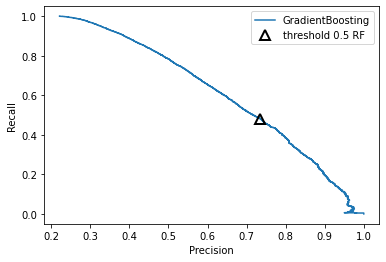

In [34]:
predicted_proba_gb = gb.predict_proba(x_test)[:,1]
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_test,
                                                    predicted_proba_gb)

plt.plot(precision_gb,recall_gb,label="GradientBoosting")
# find the threshold closest to zero
close_default_gb = np.argmin(np.abs(thresholds_gb - 0.5))

plt.plot(precision_gb[close_default_gb],recall_gb[close_default_gb],'^',c='k',
         markersize = 10,label = 'threshold 0.5 RF', fillstyle = "none", mew = 2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

ap_gb = average_precision_score(y_test, predicted_proba_gb)

print("Average Precision: ", ap_gb)

6. ROC AUC:  0.8651770308672684
Confusion Matrix:  [[32432  1661]
 [ 4940  4605]]
Classification Report:                   precision    recall  f1-score   support

No RainTomorrow       0.87      0.95      0.91     34093
   RainTomorrow       0.73      0.48      0.58      9545

       accuracy                           0.85     43638
      macro avg       0.80      0.72      0.75     43638
   weighted avg       0.84      0.85      0.84     43638



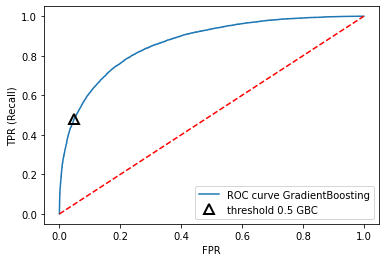

In [35]:
fpr_gb,tpr_gb, thresholds_gb =  roc_curve(y_test,predicted_proba_gb)
plt.plot(fpr_gb,tpr_gb,label = 'ROC curve GradientBoosting')
plt.xlabel('FPR')
plt.ylabel("TPR (Recall)")

close_default_gb = np.argmin(np.abs(thresholds_gb - 0.5))
plt.plot(fpr_gb[close_default_gb],tpr_gb[close_default_gb],'^',c='k',
         markersize = 10,label = 'threshold 0.5 GBC', fillstyle = "none", mew = 2)

plt.legend()
plt.plot([0,1],[0,1],'r--')
roc_auc_gb = roc_auc_score(y_test, predicted_proba_gb)

print("6. ROC AUC: ",roc_auc_gb)

cfn = confusion_matrix(y_test, pred_gb)
print("Confusion Matrix: ",cfn)

print("Classification Report: ",classification_report(y_test, pred_gb,
                            target_names=['No RainTomorrow','RainTomorrow']))

## XGB Model

In [36]:
xgb = XGBClassifier(random_state = 48)

xgb.fit(x_train,y_train)
acc_xgb = xgb.score(x_test,y_test)

pred_xgb = xgb.predict(x_test)
precision_xgb = precision_score(y_test, pred_xgb)
recall_xgb = recall_score(y_test, pred_xgb)
f1_xgb = f1_score(y_test,pred_xgb)

print("1.Accuracy: ", acc_xgb)
print("2. Precision: ", precision_xgb)
print("3. Recall: ", recall_xgb)
print("4. f1_Score: ",f1_xgb)

1.Accuracy:  0.8563178880791971
2. Precision:  0.7378358750907771
3. Recall:  0.5322158198009429
4. f1_Score:  0.6183810103469264


Average Precision:  0.7248691433689416


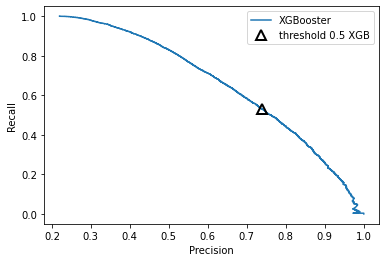

In [37]:
predicted_proba_xgb = xgb.predict_proba(x_test)[:,1]
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test,
                                                    predicted_proba_xgb)

plt.plot(precision_xgb,recall_xgb,label="XGBooster")
# find the threshold closest to zero
close_default_xgb = np.argmin(np.abs(thresholds_xgb - 0.5))

plt.plot(precision_xgb[close_default_xgb],recall_xgb[close_default_xgb],'^',c='k',
         markersize = 10,label = 'threshold 0.5 XGB', fillstyle = "none", mew = 2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

ap_xgb = average_precision_score(y_test, predicted_proba_xgb)

print("Average Precision: ", ap_xgb)

6. ROC AUC:  0.8840815688919919
Confusion Matrix:  [[32288  1805]
 [ 4465  5080]]
Classification Report:                   precision    recall  f1-score   support

No RainTomorrow       0.88      0.95      0.91     34093
   RainTomorrow       0.74      0.53      0.62      9545

       accuracy                           0.86     43638
      macro avg       0.81      0.74      0.76     43638
   weighted avg       0.85      0.86      0.85     43638



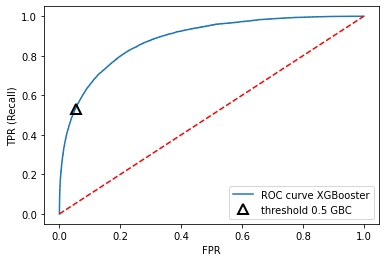

In [38]:
fpr_xgb,tpr_xgb, thresholds_xgb =  roc_curve(y_test,predicted_proba_xgb)
plt.plot(fpr_xgb,tpr_xgb,label = 'ROC curve XGBooster')
plt.xlabel('FPR')
plt.ylabel("TPR (Recall)")

close_default_xgb = np.argmin(np.abs(thresholds_xgb - 0.5))
plt.plot(fpr_xgb[close_default_xgb],tpr_xgb[close_default_xgb],'^',c='k',
         markersize = 10,label = 'threshold 0.5 GBC', fillstyle = "none", mew = 2)

plt.legend()
plt.plot([0,1],[0,1],'r--')
roc_auc_xgb = roc_auc_score(y_test, predicted_proba_xgb)

print("6. ROC AUC: ",roc_auc_xgb)

cfn = confusion_matrix(y_test, pred_xgb)
print("Confusion Matrix: ",cfn)

print("Classification Report: ",classification_report(y_test, pred_xgb,
                            target_names=['No RainTomorrow','RainTomorrow']))

In [44]:
models_acc = pd.DataFrame({
    'Model': ['Kneighbors','DecisionTree','RandomForest','GradientBoosting','XGBooster'],
    'Accuracy': [acc_knn,acc_tree,acc_rf,acc_gb,acc_xgb]
})
models_acc.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
4,XGBooster,0.856318
3,GradientBoosting,0.848733
2,RandomForest,0.841308
0,Kneighbors,0.811288
1,DecisionTree,0.789060


In [45]:
models_ROC_AUC = pd.DataFrame({
    'Model': ['Kneighbors','DecisionTree','RandomForest','GradientBoosting','XGBooster'],
    'ROC_AUC': [roc_auc_knn,roc_auc_tree,roc_auc_rf,roc_auc_gb,roc_auc_xgb]
})
models_ROC_AUC.sort_values(by = 'ROC_AUC', ascending = False)

,Model,ROC_AUC
4,XGBooster,0.884082
3,GradientBoosting,0.865177
2,RandomForest,0.842885
0,Kneighbors,0.786607
1,DecisionTree,0.693604
